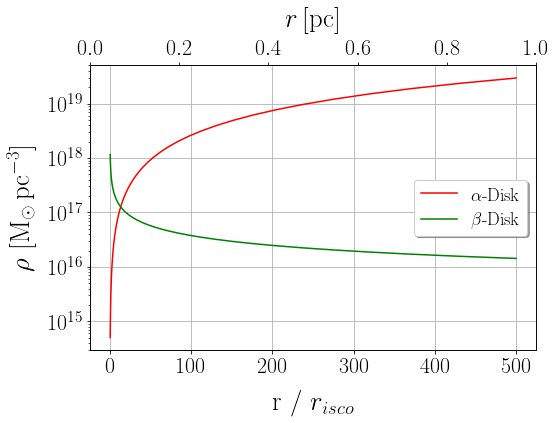

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *



import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma

from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 
    
m1 = 1e5 * c.solar_mass_to_pc
m2 = 1. *  c.solar_mass_to_pc
D = 0
sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)

alpha = 0.1
f_edd = 0.1
eps = 0.1
alphaDisk = halo.AlphaDisk(m1, alpha, f_edd, eps)
betaDisk = halo.BetaDisk(m1, alpha, f_edd, eps)

sp_b_alpha = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = alphaDisk, D=D)
sp_b_beta = ms.SystemProp(m1, m2, halo.ConstHalo(0.), baryonicHalo = betaDisk, D=D)





plt.figure(figsize=(8, 7 * 6./8.))
r_grid = np.geomspace(2*m1, 500*sp_0.r_isco())
ax_risco = plt.gca()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


ax_pc = ax_risco.twiny()
ax_risco.plot(r_grid/sp_0.r_isco(), alphaDisk.density(r_grid)/c.solar_mass_to_pc, 'r')
ax_risco.plot(r_grid/sp_0.r_isco(), betaDisk.density(r_grid)/c.solar_mass_to_pc, 'g')



ax_risco.set_yscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$",  fontsize = 27, labelpad = 12)
ax_risco.set_ylabel(r"$\rho\,\, [\mathrm{M_{\odot}\,pc^{-3}}] $", fontsize = 27, labelpad = 12)
ax_pc.set_xlabel("$r\, \mathrm{[pc]}$", fontsize = 27, labelpad = 12)
ax_risco.grid()
ax_risco.legend([r'$\alpha$-Disk', r'$\beta$-Disk'], 
           prop = {'size':18}, loc = 'center right', shadow = True, facecolor = 'white', fontsize = 65)

plt.xticks(fontsize = 22)
plt.savefig("disk.pdf", bbox_inches="tight")
plt.show()

/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime


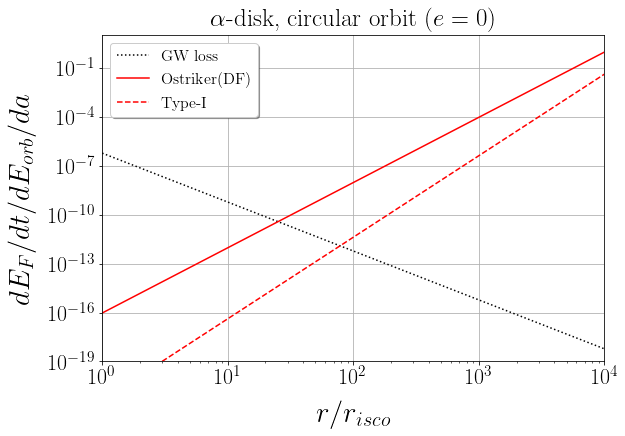

In [2]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 6))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                 'r')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                                                'r--')

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 29, labelpad = 12)
ax_risco.legend(['GW loss', 'Ostriker(DF)', 'Type-I'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'$\alpha$-disk, circular orbit ($e = 0$)', fontsize = 25, pad = 10)
plt.savefig("α_energyloss.pdf", bbox_inches="tight")
plt.show()

/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime


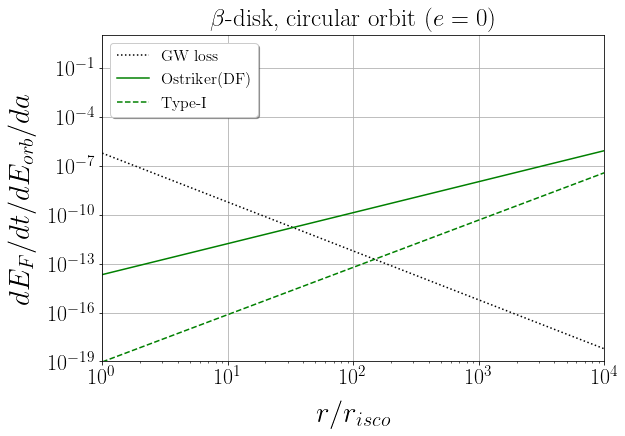

In [3]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 6))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                                'g')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                            'g--')



plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 29, labelpad = 12)
ax_risco.legend(['GW loss', 'Ostriker(DF)', 'Type-I'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'$\beta$-disk, circular orbit ($e = 0$)', fontsize = 25, pad = 10)
plt.savefig("β_energyloss.pdf", bbox_inches="tight")
plt.show()

/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime


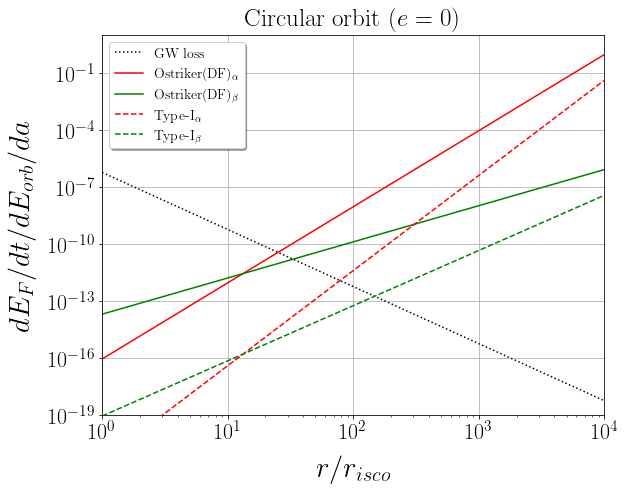

In [4]:
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

opt_gas1 = inspiral.Classic.EvolutionOptions(dissipativeForces = {forces.GWLoss(), forces.GasDynamicalFriction()}, 
                                             considerRelativeVelocities = True, progradeRotation = False, accuracy = accuracy, verbose = 1)

opt_gas2 = inspiral.Classic.EvolutionOptions(dissipativeForces={forces.GWLoss(), forces.GasInteraction()}, 
                                             considerRelativeVelocities = False, accuracy = accuracy, verbose = 1)


fig, ax = plt.subplots(1, figsize=(9, 7))
r = np.geomspace(sp_0.r_isco(), 1e4*sp_0.r_isco(), 10000)
ax_risco = plt.gca()
r_grid = np.geomspace(sp_0.r_isco(), 500*sp_0.r_isco())

ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GWLoss().dE_dt(sp_0, r, 0, opt_0))/inspiral.Classic.dE_orbit_da(sp_0, r),'k:')


ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                 'r')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasDynamicalFriction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas1))/inspiral.Classic.dE_orbit_da(sp_b_beta, r),
                                                'g')


ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_alpha, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_alpha, r),
                                               'r--')
ax_risco.loglog(r/sp_0.r_isco(), np.abs(forces.GasInteraction().dE_dt(sp_b_beta, r, e = 0, opt = opt_gas2))/inspiral.Classic.dE_orbit_da(sp_b_beta, r), 'g--')
 
                
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

ax_risco.set_xlabel('$r/r_{isco}$',  fontsize = 29, labelpad = 12)
ax_risco.set_ylabel("$dE_{F}/dt / dE_{orb}/da$",  fontsize = 29, labelpad = 12)
ax_risco.legend(['GW loss', r'Ostriker(DF)$_{\alpha}$', r'Ostriker(DF)$_{\beta}$', r'Type-I$_{\alpha}$', r'Type-I$_{\beta}$'], 
           prop = {'size':14}, loc = 'upper left', shadow = True, facecolor = 'white', fontsize = 72)

ax_risco.grid()
ax_risco.set_xlim(left = 1, right = 1e4)
ax_risco.set_ylim(bottom = 1e-19, top = 1e1)
plt.title(r'Circular orbit ($e = 0$)', fontsize = 25, pad = 10)
plt.savefig("αβ_energyloss.pdf", bbox_inches="tight")
plt.show()

In [5]:
colors = {"alpha":'r', "beta":'g', "dm":'b', 'vac':'k'}


def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-4, n_b_min=0.):
    figF.subplots_adjust(hspace=0, wspace=0)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 26)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 26)

    
    if not axes_a is None:
        for ax in axes_a:
            ax.set_xlabel('time$\, \mathrm{[yr]}$ ', fontsize = 26)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 26)

    explanatory_lines = [mpl.lines.Line2D([0], [0], color = 'k', linestyle = ':'), 
                          mpl.lines.Line2D([0], [0], color = 'g', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'r', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'g'),
                          mpl.lines.Line2D([0], [0], color = 'r')]
    axes_a[-1].legend(explanatory_lines, 
                      ['GW loss',  r'Type-I$_{\beta}$', r'Type-I$_{\alpha}$', r'Ostriker(DF)$_{\beta}$',r'Ostriker(DF)$_{\alpha}$',
                                         ], 
                               loc = 'lower left', prop = {'size':14}, shadow = True, facecolor = 'white', fontsize = 72)
    
    #axesF[0,0].set_ylabel('characteristic strain')
    axesF[0][0].set_ylabel(r'$|\Delta N|$', fontsize = 26)
    axesF[0][1].set_ylabel(r'dephasing index', fontsize = 26)
    axesF[0][2].set_ylabel(r'braking index', fontsize = 26)
    
    axesF[0][-1].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 26)
    
    axesF[0][0].set_xlim(left =  f_min)
    axesF[0][0].set_ylim(bottom = 1., top = 1e10)
    axesF[0][2].set_ylim(bottom = n_b_min, top =  5)
    axesF[0][1].set_ylim(bottom = -8, top = 0)

    for ax in axesF[0]:
        ax.grid()



Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, DynamicalFrictionLoss=False
A termination event occurred.
 -> Evolution took 0.2821s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWar

A termination event occurred.
 -> Evolution took 0.2568s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1992s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:566: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:551: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:507: RuntimeWarning: invalid value encountered in double_scalars
  * (self.M / 1e6 / c.solar_mass_to_pc)**(1./5.) * (r / 10./self.M)**(-3./5.))


A termination event occurred.
 -> Evolution took 0.1965s
Evolving from  500.0  to  1.0 r_isco   on circular orbits  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1800s


/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/plot_utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  ax_di.plot(f_gw1[:stop]/c.hz_to_invpc, (ddN_df/dN * f_gw1)[:stop], color=l.get_c(), **kwargs)


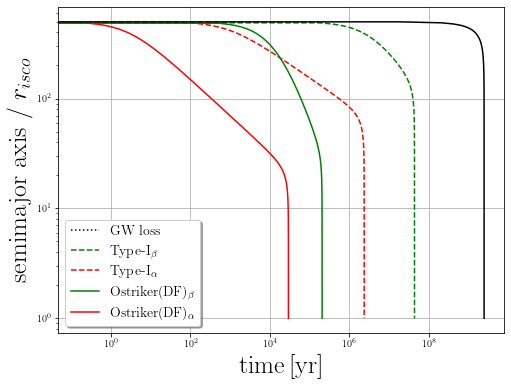

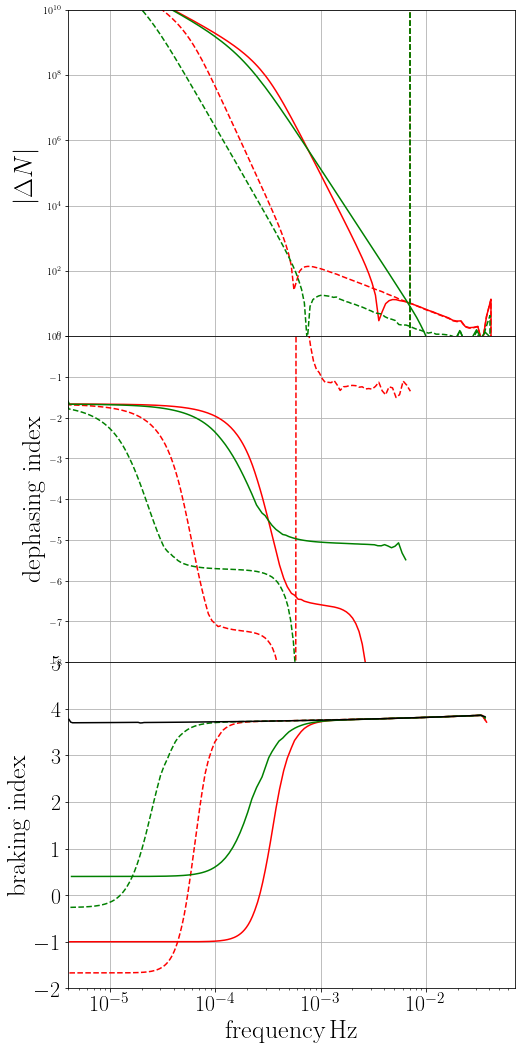

In [6]:
a0 = 500 * sp_0.r_isco()
e0 = 0

ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, opt = opt_0)
ev_alpha_gas1 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas1)
ev_alpha_gas2 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas2)
ev_beta_gas1  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas1)
ev_beta_gas2  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas2)


fig_ae, axes_ae = plt.subplots(1, 1, figsize=(8,6))
#fig_ae, axes_ae = plt.subplots(2, 1, figsize=(8,12))
fig_gw, axes_gw = plt.subplots(3, 1, figsize=(8,18), sharex='all', sharey='row')


# accretion disks
l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1, ax_a=axes_ae, ax_n=axes_gw[2], label='Ostriker', color=colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')

l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_a=axes_ae, ax_n=axes_gw[2], label='Type I', linestyle='--', color=colors["alpha"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_alpha, ev_alpha_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_a=axes_ae, ax_n=axes_gw[2], label='Ostriker', color=colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas1, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Ostriker')

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_a=axes_ae, ax_n=axes_gw[2], label='Type I', linestyle='--', color=colors["beta"])
plot_utils.plotDeltaN(sp_0, ev_0, sp_b_beta, ev_beta_gas2, axes_gw[0], ax_di=axes_gw[1], plotFgw5year=True, color=l.get_c(), label='Type I', linestyle='--')


# vacuum
l = plot_utils.plotEvolution(sp_0, ev_0, ax_a=axes_ae, ax_n=axes_gw[2], label='GW', color=colors["vac"])


preparePlots(fig_gw, [axes_gw], axes_a=[axes_ae], f_min=4e-6, n_b_min=-2)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

fig_ae.savefig("evolution_baryons.pdf", bbox_inches="tight")
fig_gw.savefig("gwSignal_baryons.pdf", bbox_inches="tight")

plt.show()

Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, DynamicalFrictionLoss=False
A termination event occurred.
 -> Evolution took 5.0012s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:314: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + np.abs(v_rel)/c_s)/(1. - np.abs(v_rel)/c_s)) - np.abs(v_rel)/c_s) # subsonic regime
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:42: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Downloads/imripy-main/src/imripy/inspiral/forces.py:43: RuntimeWarning: invalid value encountered in sqrt
  v_phi = r * np.sqrt(sp.m_total(a)*a*(1.-e**2))/r**2
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:434: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:419: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:375: RuntimeWarning: invalid val

A termination event occurred.
 -> Evolution took 6.7041s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/merger_system.py:198: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)


A termination event occurred.
 -> Evolution took 3.9819s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GasDynamicalFriction, GWLoss, }, accuracy = 1.0e-10


/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:566: RuntimeWarning: invalid value encountered in sqrt
  v_phi = np.sqrt(self.M/r)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:551: RuntimeWarning: invalid value encountered in sqrt
  Omega = np.sqrt(self.M/r**3)
/home/pratibhajangra/Downloads/imripy-main/src/imripy/halo/baryonic.py:507: RuntimeWarning: invalid value encountered in double_scalars
  * (self.M / 1e6 / c.solar_mass_to_pc)**(1./5.) * (r / 10./self.M)**(-3./5.))


A termination event occurred.
 -> Evolution took 5.1333s
Evolving from  500.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative Forces emplyed {GWLoss, GasInteraction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 3.5230s


TypeError: 'AxesSubplot' object is not iterable

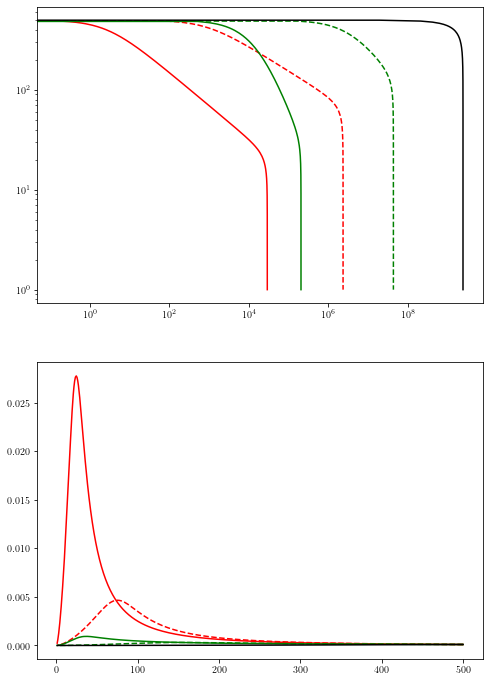

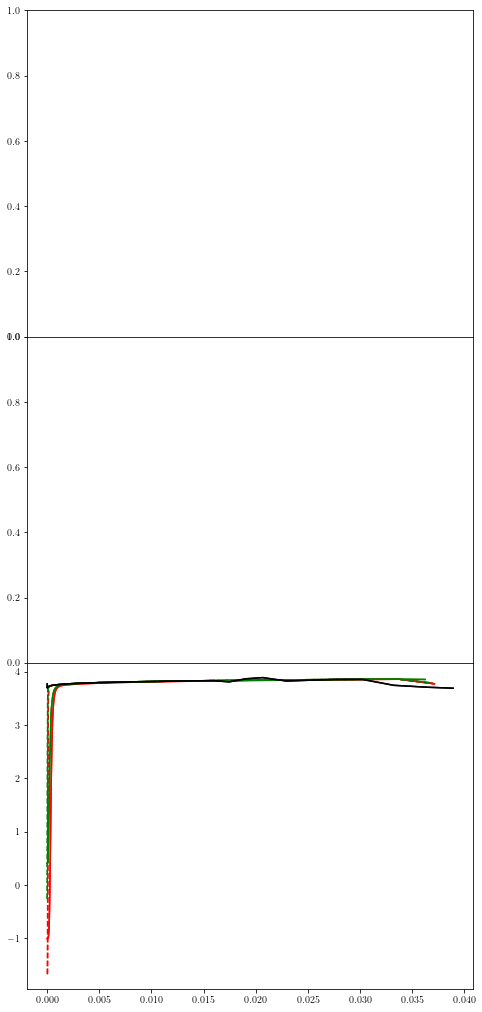

In [12]:
colors = {"alpha":'r', "beta":'g', "dm":'b', 'vac':'k'}


def preparePlots(figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=1e-4, n_b_min=0.):
    figF.subplots_adjust(hspace=0, wspace=0)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.set_xlabel('semimajor axis / $r_{isco}$', fontsize = 26)
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity', fontsize = 26)

    
    if not axes_a is None:
        for ax in axes_a:
            ax.set_xlabel('time$\, \mathrm{[yr]}$ ', fontsize = 26)
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$', fontsize = 26)

    explanatory_lines = [mpl.lines.Line2D([0], [0], color = 'k', linestyle = ':'), 
                          mpl.lines.Line2D([0], [0], color = 'g', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'r', linestyle = '--'),
                          mpl.lines.Line2D([0], [0], color = 'g'),
                          mpl.lines.Line2D([0], [0], color = 'r')]
    axes_a[-1].legend(explanatory_lines, 
                      ['GW loss',  r'Type-I$_{\beta}$', r'Type-I$_{\alpha}$', r'Ostriker(DF)$_{\beta}$',r'Ostriker(DF)$_{\alpha}$',
                                         ], 
                               loc = 'lower left', prop = {'size':14}, shadow = True, facecolor = 'white', fontsize = 72)
    
    #axesF[0,0].set_ylabel('characteristic strain')
    axesF[0][0].set_ylabel(r'$|\Delta N|$', fontsize = 26)
    axesF[0][1].set_ylabel(r'dephasing index', fontsize = 26)
    axesF[0][2].set_ylabel(r'braking index', fontsize = 26)
    
    axesF[0][-1].set_xlabel('frequency$\, \mathrm{Hz}$', fontsize = 26)
    
    axesF[0][0].set_xlim(left =  f_min)
    axesF[0][0].set_ylim(bottom = 1., top = 1e10)
    axesF[0][2].set_ylim(bottom = n_b_min, top =  5)
    axesF[0][1].set_ylim(bottom = -8, top = 0)

    for ax in axesF[0]:
        ax.grid()




a0 = 500 * sp_0.r_isco()
e0 = 1e-4
accuracy = 1e-10
opt_0 = inspiral.Classic.EvolutionOptions(DynamicalFrictionLoss = False, accuracy = accuracy, verbose = 1)

ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, opt = opt_0)
ev_alpha_gas1 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas1)
ev_alpha_gas2 = inspiral.Classic.Evolve(sp_b_alpha, a0, e0, opt = opt_gas2)
ev_beta_gas1  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas1)
ev_beta_gas2  = inspiral.Classic.Evolve(sp_b_beta, a0, e0, opt  = opt_gas2)



        
#fig_ae, axes_ae = plt.subplots(1, 1, figsize=(8,6))
fig_ae, axes_T = plt.subplots(2, 1, figsize=(8,12))
fig_gw, axes_gw = plt.subplots(3, 1, figsize=(8,18), sharex='all', sharey='row')


# accretion disks
l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1,  ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Ostriker', color = colors["alpha"])
plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas1,  ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Ostriker', color = colors["alpha"])

l = plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["alpha"])
plot_utils.plotEvolution(sp_b_alpha, ev_alpha_gas2, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["alpha"])

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Ostriker', color = colors["beta"])
plot_utils.plotEvolution(sp_b_beta, ev_beta_gas1, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Ostriker', color = colors["beta"])

l = plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["beta"])
plot_utils.plotEvolution(sp_b_beta, ev_beta_gas2, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'Type I', linestyle = '--', color = colors["beta"])

# vacuum
l = plot_utils.plotEvolution(sp_0, ev_0, ax_a = axes_T[0], ax_n = axes_gw[2], label = 'GW', color = colors["vac"])
plot_utils.plotEvolution(sp_0, ev_0, ax_ae = axes_T[1], ax_n = axes_gw[2], label = 'GW', color = colors["vac"])


preparePlots(fig_gw, [axes_gw], axes_ae = axes_T[1],  axes_a = axes_T[0], f_min = 4e-6, n_b_min = -2)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

fig_ae.savefig("evolution_baryons.pdf", bbox_inches = "tight")
fig_gw.savefig("gwSignal_baryons.pdf", bbox_inches = "tight")
plt.show()